<a href="https://colab.research.google.com/github/EdvaldoFilhoPro/Vendas_de_supermercado/blob/main/analise_de_dados_vendas_de_supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vendas de supermercado

**Registro histórico de dados de vendas em 3 supermercados diferentes**

**Sobre o conjunto de dados**

***Contexto***

*O crescimento dos supermercados nas cidades mais populosas está aumentando e as competições de mercado também são altas. O conjunto de dados é uma das vendas históricas da empresa de supermercados que registrou dados em 3 filiais diferentes por 3 meses. Os métodos de análise preditiva de dados são fáceis de aplicar com este conjunto de dados.*

https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

### Importação das bibliotecas e base de dados

> Este código em Python tem como objetivo ler um arquivo CSV de vendas de supermercado, pré-processar e explorar os dados. A seguir, uma explicação linha a linha:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

> Nesta seção, estamos importando as bibliotecas que serão utilizadas no script. `pandas` é uma biblioteca para manipulação de dados, `numpy`é uma biblioteca para operações matemáticas, `seaborn `é uma biblioteca para visualização de dados, `matplotlib` é uma biblioteca para criação de gráficos e `datetime` é uma biblioteca para manipulação de datas e horas.

### Dados de vendas

> Aqui, estamos lendo o arquivo CSV de vendas de supermercado utilizando o método `read_csv` da biblioteca pandas. O arquivo está localizado em `/content/supermarket_sales.csv` e será armazenado na variável `vendas_df`.

In [3]:
vendas_df = pd.read_csv('/content/supermarket_sales.csv')

> O método `head `da variável `vendas_df` exibe as cinco primeiras linhas do conjunto de dados. Isso nos ajuda a ter uma ideia geral de como os dados estão organizados.

In [4]:
vendas_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


> Aqui, estamos renomeando as colunas do conjunto de dados utilizando o método `rename` da biblioteca pandas. Isso é importante para que as colunas tenham nomes mais descritivos e fáceis de entender. Os novos nomes são passados como um dicionário onde a chave é o nome atual da coluna e o valor é o novo nome da coluna.

In [5]:
vendas_df = vendas_df.rename(columns={'Invoice id': 'id_venda', 'Branch': 'filial', 'City': 'cidade', 'Customer type': 'tipo_cliente', 'Gender': 'genero',
                                      'Product line': 'linha_produto', 'Unit price': 'preco_unitario', 'Quantity': 'quantidade', 'Tax 5%': 'Imposto 5%',
                                      'Total': 'total', 'Date': 'data', 'Time': 'hora', 'Payment': 'pagamento', 'cogs': 'custo_total', 'gross margin percentage': 'margem_bruta',
                                      'gross income':'renda_bruta', 'Rating': 'avaliacao' }) 

> O método `describe` da variável `vendas_df` retorna uma estatística descritiva do conjunto de dados. Isso inclui informações como a contagem, a média, o desvio padrão, o valor mínimo e máximo, e os quartis dos dados numéricos.

In [6]:
vendas_df.describe()

,preco_unitario,quantidade,Imposto 5%,total,custo_total,margem_bruta,renda_bruta,avaliacao
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


### Exploração dos dados 

> Por fim, estamos criando um mapa de calor utilizando a biblioteca `seaborn` para visualizar os valores nulos no conjunto de dados. Isso é útil para identificar quais colunas possuem valores ausentes e para decidir como lidar com esses valores durante o pré-processamento dos dados.

In [7]:
vendas_df = vendas_df.dropna()

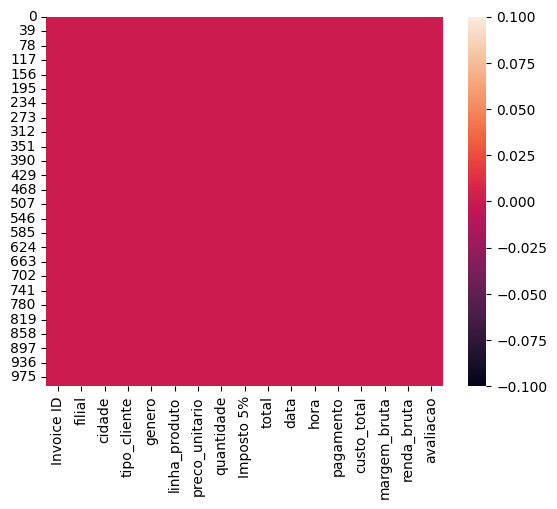

In [8]:
sns.heatmap(vendas_df.isnull())

In [9]:
vendas_df['filial'].unique()

array(['A', 'C', 'B'], dtype=object)

> Essa linha de código cria um gráfico de barras utilizando a biblioteca Seaborn para mostrar as vendas totais por filial.

> A função `sns.barplot()` é utilizada para criar o gráfico de barras e recebe três parâmetros:

*  `x`: a coluna que será utilizada no eixo x do gráfico, neste caso a coluna 'filial' do DataFrame `vendas_df`;


*  `y`: a coluna que será utilizada no eixo y do gráfico, neste caso a coluna 'total' do DataFrame `vendas_df`;

*  `data`: o DataFrame que contém os dados que serão utilizados no gráfico, neste caso o `vendas_df`.

> Dessa forma, o gráfico de barras apresentará no eixo x as filiais (que são os valores únicos da coluna 'filial') e no eixo y as vendas totais correspondentes a cada filial (calculadas pela função de agregação utilizada anteriormente).

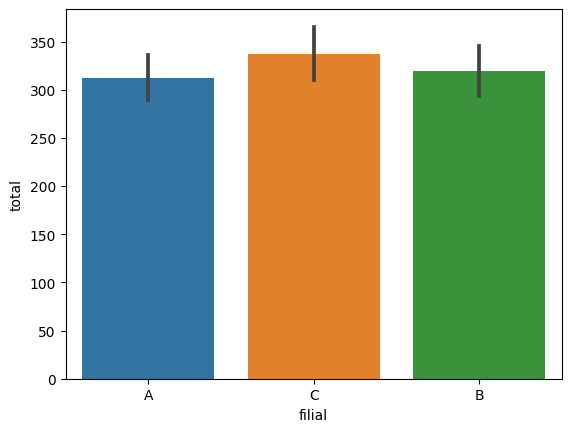

In [10]:
# Crie um gráfico de barras para mostrar as vendas totais por filial
sns.barplot(x='filial', y='total', data=vendas_df);

> A linha de código em questão faz a conversão do tipo de dados da coluna `'data'` do dataframe `'vendas_df'` de string para datetime usando a função `'to_datetime'` do pandas. Essa função recebe como argumento a coluna a ser convertida e retorna uma série do tipo datetime.

> Após a conversão, a segunda linha apenas exibe a coluna `'data'` do dataframe `'vendas_df'`, que agora contém valores do tipo datetime.

Também podemos criar um gráfico de dispersão para visualizar a relação entre preço e avaliação dos produtos:

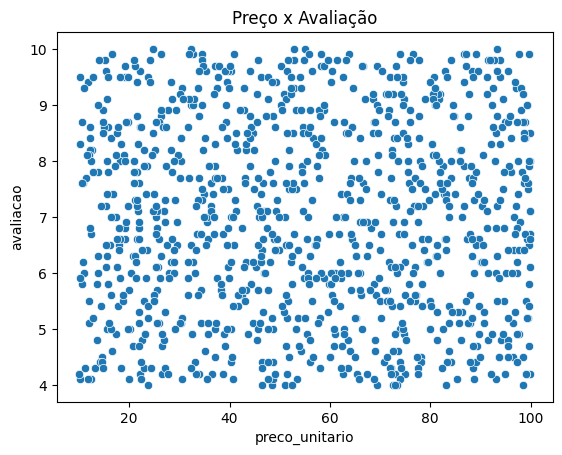

In [11]:
sns.scatterplot(x='preco_unitario', y='avaliacao', data=vendas_df)
plt.title('Preço x Avaliação')
plt.show()

O código `sns.scatterplot(x='preco_unitario', y='avaliacao', data=vendas_df) `plota um gráfico de dispersão (scatterplot) utilizando o eixo x para o preço_unitário e o eixo y para a avaliação de vendas. O parâmetro data=vendas_df indica que os dados usados para o gráfico estão armazenados no dataframe `vendas_df`.

Em seguida, `plt.title('Preço x Avaliação')` adiciona um título ao gráfico, "Preço x Avaliação".

Finalmente,` plt.show()` exibe o gráfico na tela.

In [12]:
# Conversão para Data
vendas_df['data'] =  pd.to_datetime(vendas_df['data']);
vendas_df['data']

0     2019-01-05
1     2019-03-08
2     2019-03-03
3     2019-01-27
4     2019-02-08
         ...    
995   2019-01-29
996   2019-03-02
997   2019-02-09
998   2019-02-22
999   2019-02-18
Name: data, Length: 1000, dtype: datetime64[ns]

> Essas duas linhas de código são usadas para extrair o ano e o mês de uma coluna de datas no DataFrame `vendas_df`usando a biblioteca Pandas do Python.

> Na primeira linha, `vendas_df['Mes'] = pd.DatetimeIndex(vendas_df['data']).month`, uma nova coluna chamada 'Mes' é criada no DataFrame `vendas_df`. O `pd.DatetimeIndex()`é uma função da biblioteca Pandas que transforma a coluna de datas `vendas_df['data']`em um objeto DatetimeIndex. O método `.month`é então usado para extrair apenas o mês de cada data e atribuí-lo à coluna 'Mes'.

>Na segunda linha, `vendas_df['Ano'] = pd.DatetimeIndex(vendas_df['data']).year`, uma nova coluna chamada 'Ano' é criada no DataFrame `vendas_df`. O mesmo processo é utilizado, mas agora o método `vendas_df`é utilizado para extrair apenas o ano de cada data e atribuí-lo à coluna 'Ano'.

In [13]:
# Extrair o Ano e Mes
vendas_df['Mes'] = pd.DatetimeIndex( vendas_df['data'] ).month
vendas_df['Ano'] = pd.DatetimeIndex( vendas_df['data'] ).year
vendas_df.head(2)

,Invoice ID,filial,cidade,tipo_cliente,genero,linha_produto,preco_unitario,quantidade,Imposto 5%,total,data,hora,pagamento,custo_total,margem_bruta,renda_bruta,avaliacao,Mes,Ano
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,2019


Em seguida, podemos visualizar a distribuição das vendas ao longo dos meses e filiais utilizando um gráfico de barras com a biblioteca `matplotlib`:

<Figure size 3000x800 with 0 Axes>

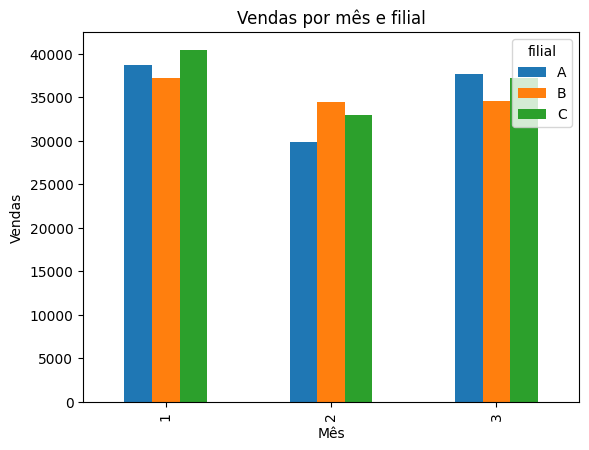

In [14]:
plt.figure(figsize=(30,8))
vendas_por_mes = vendas_df.groupby(['Mes', 'filial'])['total'].sum().unstack()
vendas_por_mes.plot(kind='bar')
plt.title('Vendas por mês e filial')
plt.xlabel('Mês')
plt.ylabel('Vendas')
plt.show()

Podemos ainda criar um gráfico de correlação para identificar quais variáveis têm uma forte correlação positiva ou negativa entre si:

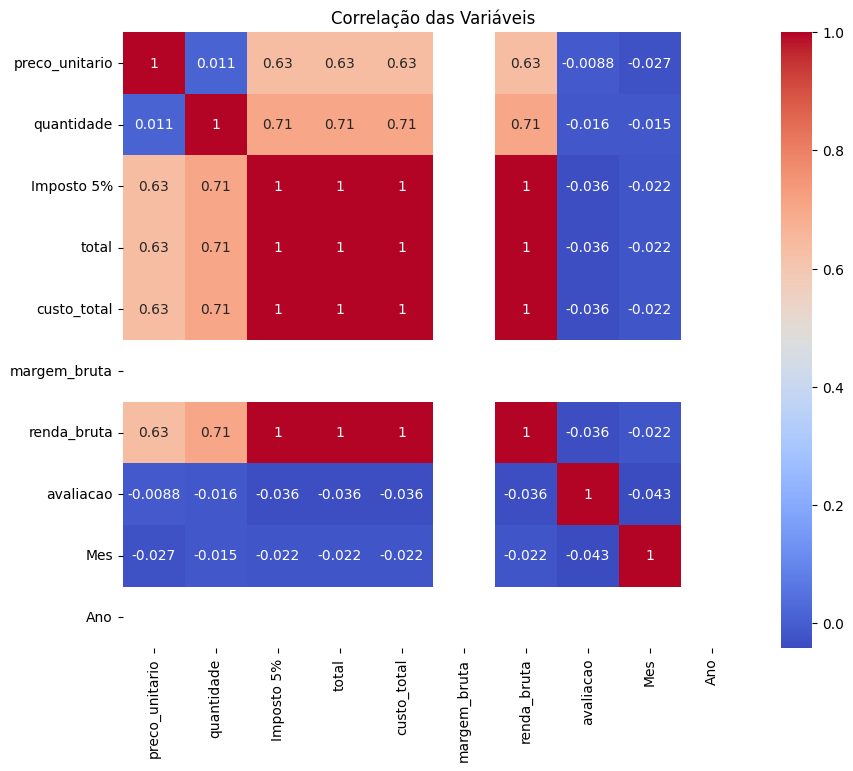

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(vendas_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlação das Variáveis')
plt.show()

Este código utiliza a biblioteca Seaborn e Matplotlib para criar um mapa de calor (heatmap) da matriz de correlação dos dados do DataFrame `vendas_df`.

A função `vendas_df.corr()` retorna uma matriz de correlação, que mostra a relação entre todas as variáveis numéricas do DataFrame `vendas_df`. Cada célula da matriz representa a correlação entre duas variáveis, variando de -1 (correlação negativa perfeita) a 1 (correlação positiva perfeita), enquanto 0 indica nenhuma correlação.


Por fim, podemos aplicar técnicas de análise preditiva, como a regressão linear, para prever as vendas futuras com base nas informações históricas. Para isso, primeiro criaremos um conjunto de dados de treinamento e teste:

In [16]:
from sklearn.model_selection import train_test_split

X = vendas_df[['preco_unitario', 'quantidade', 'custo_total', 'renda_bruta']]
y = vendas_df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Em seguida, treinaremos nosso modelo de regressão linear e avaliaremos seu desempenho:

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('R2 Score:', r2_score(y_test, y_pred))


R2 Score: 1.0


Com esta análise, podemos entender melhor as vendas da empresa de supermercados, visualizar as informações e aplicar técnicas de análise preditiva para prever as vendas futuras.